# Precipitaion Forecasting
In this project, we have trained different types of machine learning models on some data about weather to predict precipitation.

## Introduction
_Weather forecasting_ is using data about the current state and predict how the atmosphere will change. Weather warnings are used to protect lives and property, weather forecasting improves transportation safety, and precipitation forecasting is important to agriculture. There are many different ways of weather prediction. We have used machine learning models and compared the predicted results with actual values.
#### Study area
Basel is a city in northwest Switzerland. On average $51\%$ days of the year have precipitation more than $0.1mm$. The total precipitation is around $850 mm$ annually.
### Methodology
At first, data is collected. Then, some preprocessing techniques are used to prepare data for machine learning models. Finally, different machine learning techniquies are applied and the accuracy for each is reported.\
The following libraries are used.

In [4]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline

from getdata import get_data, write_daily_data, read_daily_data
from preprocessing import drop_missing_data, change_resolution_to_daily
from visualize import show_histogram
from models import linear_model

## Dataset
**You can find and download the dataset in [this](https://www.meteoblue.com/en/weather/archive/export) link.**
#### About dataset
This dataset contains some attributes about weather for Basel, from *January, 2014* to *November, 2023* with hourly resolution. The first nine rows are some basic information about location of city and units of measurements which we do not need it.

In [5]:
data = get_data()
print(f"Number of samples:      {data.shape[0]}")
print(f"Number of features:     {data.shape[1]}")

Number of samples:      86664
Number of features:     7


### Cleaning dataset
There are some rows at the end of dataset which are empty, _missing data_. We simply drop them. A day after the missing data is not complete. For simplicity we remove this day as well.

In [7]:
missing_data = drop_missing_data(data)
print(f"Number of missing rows: {missing_data}")
print(f"Number of samples:      {data.shape[0]}")

Number of missing rows: 191
Number of samples:      86472


### Parameters
In our data, each row represents a sample and each column represents a feature. Here is the list of columns
- Temperature (*T*)
- Precipitation Total (*PT*)
- Relative Humidity (*RH*)
- Wind Speed (*WS*)
- Wind Direction (*WD*)
- Cloud Cover Total (*CCT*)
- Mean Sea Level Pressure (*MSLP*)

measured hourly. This list is raw and we will do some operations to get ready for models.

## Preprocessing
### Make samples daily
Forecasting for a whole day is more general than one hour, so we decided to merge each $24$ sample to convert the resolution to daily by get mean for each feature.
- Specifically for temperature, having _maximum_, _minimum_, and _mean_ is better.
- Precipitation should be the _sum_ instead of _mean_.

In [8]:
daily_data = change_resolution_to_daily(data)
daily_data

Variable           MEANT    PT         RH         WS          WD        CCT  \
Year Month Day                                                                
2014 1     1    4.494412   1.4  90.203694  16.615975  166.495278  59.916667   
           2    5.978995   6.8  92.044333  20.621631  184.099628  63.875000   
           3    6.586079   0.8  88.778159  22.263927  183.268500  50.108334   
           4    6.358579  16.5  94.172092  15.272616  158.277724  66.666667   
           5    4.995662   5.5  86.622807  16.897822  225.090521  59.383333   
...                  ...   ...        ...        ...         ...        ...   
2023 11    8    7.268995   0.0  82.063136  17.965620  202.643658  33.016667   
           9    7.729829   4.2  82.235617  25.143419  196.132513  69.020834   
           10   9.101078   9.3  76.940065  27.342357  228.518643  61.875000   
           11   7.350245   3.2  82.186650  22.030794  242.243293  49.875000   
           12   5.818162  14.0  93.582846  18.648649  181.010854  85.333333   

Variable               MSLP       MAXT      MINT  
Year Month Day                                    
2014 1     1    1014.029167   8.720245  0.310245  
           2    1008.670833   9.240245  3.530245  
           3    1013.070833  10.400246  2.340245  
           4    1007.625000   8.480246  4.600245  
           5    1010.754167   7.480245  0.440245  
...                     ...        ...       ...  
2023 11    8    1019.379167  12.380245  3.760245  
           9    1010.795833  10.380245  3.690246  
           10   1005.745833  10.670245  7.960245  
           11   1010.391667   8.660245  4.260245  
           12   1010.112500  11.230246  2.140245  

[3603 rows x 9 columns]

Now we have $8$ _features_ and $3603$ _samples_. _PT_ is actually the target value.\
For saving time, we write daily data in a file.

In [10]:
write_daily_data(daily_data)
_, FEATURES, X, y = read_daily_data()

### Visualize parameters distribution
A [histogram](https://www.investopedia.com/terms/h/histogram.asp#:~:text=A%20histogram%20is%20a%20graph,how%20often%20that%20variable%20appears) is a graph that shows the frequency of numerical data using rectangles. The height of each rectangle represents the distribution frequency of a variable. The width of the rectangle represents the value of the variable. Here is the histogram for features and target value.

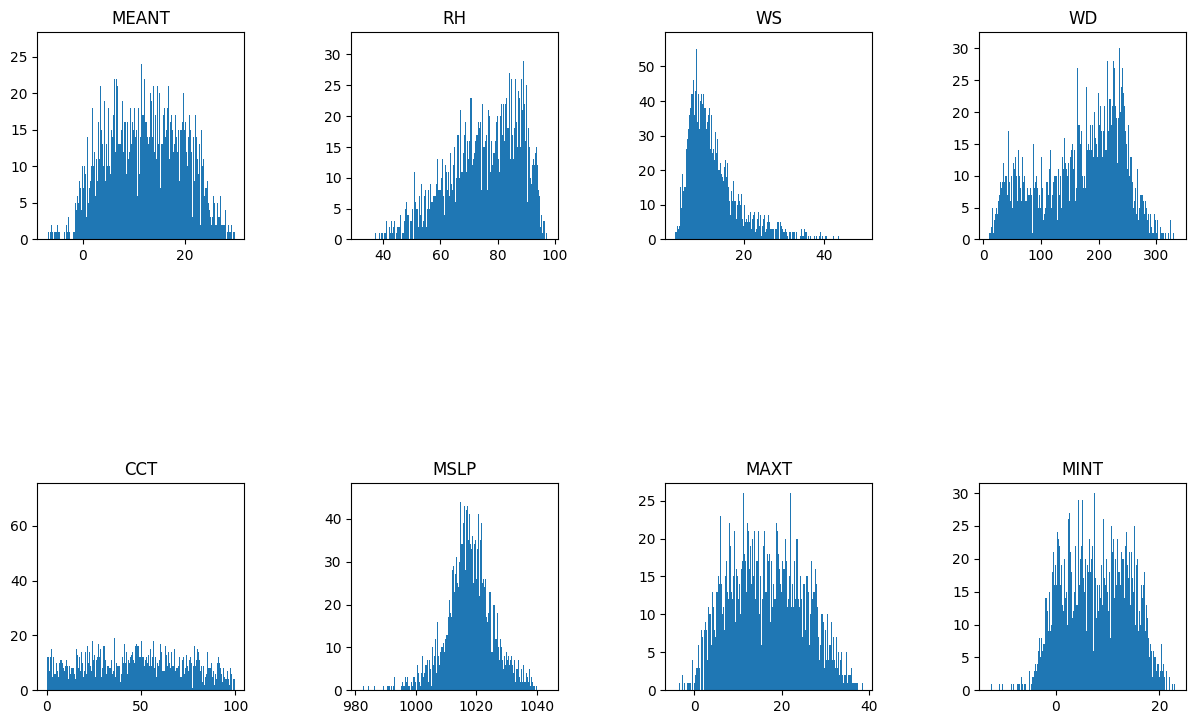

In [11]:
show_histogram(X.values)

### Standardization
In general, many learning algorithms such as linear models benefit from standardization of the data set.

In [ ]:
stnd_s = StandardScaler()

## Models
We start by Linear Model.

### Linear Model
In this model, target value is expected to be a linear combination of the features.

In [ ]:
accuracy_table = linear_model(X, y)

In [ ]:
accuracy_table

The accuracy is meaningless. The reason is we don't apply scaling.

In [ ]:
X_std = stnd_s.fit_transform(X)
accuracy_table = linear_model(X_std, y)

In [ ]:
accuracy_table

An attractive trend is when Train Size becomes larger, Train Score decreases and Test Score increases. In general, accuracy for Linear Model is about 40 percent and this is not good.

In [ ]:
import torch
import torch.nn as nn


class LogReg(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear1 = nn.Linear(20000, 1)
        # self.linear2 = nn.Linear(10000,5000)
        # self.linear3 = nn.Linear(5000, 2500)
        # self.linear4 = nn.Linear(2500, 1250)
        # self.linear5 = nn.Linear(1250, 625)
        # self.linear6 = nn.Linear(625, 125)
        # self.linear7 = nn.Linear(125, 1)
        
    def forward(self, xb):
        xb.to(device)
        out = self.linear1(xb.to(device)).to(device)
        # out = self.linear2(out.to(device)).to(device)
        # out = self.linear3(out.to(device)).to(device)
        # out = self.linear4(out.to(device)).to(device)
        # out = self.linear5(out.to(device)).to(device)
        # out = self.linear6(out.to(device)).to(device)
        # out = self.linear7(out.to(device)).to(device)
        return out

### Other Models
This is like ...
If we apply it, results:
###### SOME FIGUERS AND PLOTS TO SHOW THE RESULTS
Calculate performance, error, advantages and disadvantages

## Conclusion
- Forecasting is good.
- Undestand that these features have a stronger affect in result.
- This Model is better in performance.
- Add references if necessary.